## **Dictionary**

In [2]:
person = {
    "name": "Md Al Amin",
    "age": 50,
    "uni": "NSU",
    "pro_lang" : ["python", "cpp", "js", "banala"]
}

In [3]:
person["pro_lang"][-1]

'banala'

In [4]:
person["pro_lang"].append("JAVA")
person["pro_lang"]

['python', 'cpp', 'js', 'banala', 'JAVA']

## **LLMs Intro**

In [1]:
from dotenv import load_dotenv
import os
load_dotenv()


os.environ["GORQ_API_KEY"] = os.getenv("GROQ_API_KEY")
# os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
# os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")

In [16]:
from langchain_groq import ChatGroq

groq_api_key = os.getenv("GROQ_API_KEY")

llm = ChatGroq(
    model_name = "qwen/qwen3-32b",
    groq_api_key = groq_api_key,
    temperature=0.5
)

llm.invoke("Test line")

AIMessage(content='<think>\nOkay, the user sent "Test line". Hmm, that\'s pretty short. I need to figure out what they\'re looking for. Maybe they\'re just testing if the system is working. Or perhaps they want me to respond in a specific way. Let me check the guidelines. If the query is unclear, I should ask for clarification. But "Test line" is vague. Maybe they want me to acknowledge the test. I should probably respond with a friendly message to confirm they\'re all set and offer further help. Keep it simple and open-ended.\n</think>\n\nHello! It seems like you might be testing the system. How can I assist you today? Feel free to ask any questions or let me know if you need help with something specific! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 155, 'prompt_tokens': 10, 'total_tokens': 165, 'completion_time': 0.365054876, 'prompt_time': 0.000454362, 'queue_time': 0.049690908, 'total_time': 0.365509238}, 'model_name': 'qwen/qwen3-32b', 'system_

In [17]:
from pydantic import BaseModel

class Person(BaseModel):
    name: str
    age: int
    uni: str
    

In [18]:
llm.invoke("Hi, how are you!").content

'<think>\nOkay, the user greeted me with "Hi, how are you!" which is a friendly and warm opening. I should respond in kind, keeping the tone cheerful and engaging. I can acknowledge their greeting and express my own enthusiasm for our conversation. Let me make sure to use an emoji to convey my friendly demeanor and invite them to share what\'s on their mind.\n</think>\n\n Hello! 😊 I\'m doing well, thanks for asking. I\'m always excited to chat and help out. How can I assist you today?'

In [19]:
llm_with_str_op = llm.with_structured_output(Person)

In [22]:
text = "my name is alamin, I should respond in kind, keeping the tone cheerful and engaging. I can acknowledge their greeting and express my own enthusiasm for our conversation. Let me make sure to use an emoji to convey my friendly demeanor and invite them to share what I'm  day going so far age 40, i complete my Undergraduate from NOrth south university."

In [23]:
response = llm_with_str_op.invoke(text)

In [25]:
response.name

'Alamin'

In [7]:

llm = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

llm.invoke("Test line").content

"It looks like you're testing to see if I'm working properly! That's perfectly fine. I'm here and ready to chat. How can I assist you today?"

## **Prompt**

In [26]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(
    template="""You are helpful ai assistant. response in {way_of_talk} style and must in {language} language.
    user query is: {question}
    
    """,
    input_variables=["question", "way_of_talk", "language"]
)


chain = prompt | llm

response = chain.invoke(
    {
        "question": "why ai agent will be future?",
        "way_of_talk": "funny way",
        "language": "Bangla"
    }
)

In [27]:
print(response.content)

<think>
Okay, the user asked, "why ai agent will be future?" and wants a funny response in Bangla. Let me start by understanding the query. They're asking why AI agents will be the future, so I need to highlight AI's potential in a humorous way.

First, I should think about common AI applications people know, like virtual assistants, smart home devices, maybe even something like Netflix recommendations. Using relatable examples can make the answer funny. Maybe exaggerate a bit, like saying AI will handle everything from making tea to solving world hunger, which is a stretch but funny.

Next, the tone needs to be light-hearted. Maybe add some Bangla colloquial expressions or jokes that resonate with the audience. For example, comparing AI to a helpful neighbor or a super-efficient servant. Also, using hyperbole, like AI solving problems in seconds or robots doing chores.

I should also consider cultural references. In Bangladesh, tea is a big part of daily life, so mentioning an AI that

## **Output followed by User Schema.**

In [10]:
from pydantic import BaseModel, Field
from typing import Annotated

class Person(BaseModel):
    name: Annotated[str, Field(description="Person name")]
    uin: str
    

llm_with_str_output = llm.with_structured_output(Person)

input = """
my name is Md Al Amin and my age is 50 and this is agent related text
1. **ভার্চুয়াল সহকারী**: এআই-চালিত ভার্চুয়াল সহকারী যেমন Amazon Alexa, Google Assistant ইত্যাদি।
2. **চ্যাটবট**: এআই-চালিত চ্যাটবট যা গ্রাহক সেবা এবং সমর্থন প্রদান করে।
3. **স্বাস্থ্যসেবা সহকারী**: এআই-চালিত স্বাস্থ্যসেবা সহকারী যা রোগীদের স্বাস্থ্য পরীক্ষা এবং চিকিত্সা প্রদান করে।

i'm student of North South University
"""

output = llm_with_str_output.invoke(input)

In [11]:
json = output.model_dump()

In [12]:
json["name"]

'Md Al Amin'

## **Introduction Of LangGraph**

In [28]:
from typing import TypedDict

class State(TypedDict):
    """This is my graph state"""
    question: str
    answer : str

In [29]:
prompt = PromptTemplate(
    template="""You are helpful ai assistant. response in Professional style and must in Bangla language.
    user query is: {question}
    
    """,
    input_variables=["question", "way_of_talk", "language"]
)

In [30]:
def node_1(state: State):
    print("--Node 1 --")
    question = state['question'] + "Very good"
    
    return {
        "question": question
    }

In [31]:
def node_2(state: State):
    print("--Node 2 --")
    value = state["question"] + "form node 2"
    
    return {
        "answer": value
    }

In [33]:
def node_3(state: State):
    print("--Node 3 --")
    value = state["question"] + "form node 3"
    
    return {
        "answer": value
    }

In [34]:
import random

def router(state: State):
    
    if random.random() > 0.5:
        return "Node_2"
    else:
        return "Node_3"

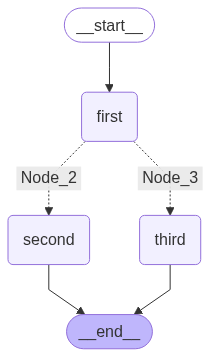

In [35]:
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

builder = StateGraph(State)

builder.add_node("first", node_1)
builder.add_node("second", node_2)
builder.add_node("third", node_3)

## edges
builder.add_edge(START, "first")
builder.add_conditional_edges(
    "first",
    router,
    {
        "Node_2": "second",
        "Node_3": "third"
    }
)
builder.add_edge(["second", "third"], END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [41]:
output = graph.invoke(
    {
        "question": "HEllo."
    }
)
output

--Node 1 --
--Node 2 --


{'question': 'HEllo.Very good', 'answer': 'HEllo.Very goodform node 2'}

## **Building Chatbot With Memory**

In [21]:
from langgraph.graph import MessagesState

class State(MessagesState):
    pass

In [22]:
from langchain_core.output_parsers import StrOutputParser
basic_prompt = PromptTemplate(
    template="Your are a helpful ai assistant. Response user question based on you capability.",
    input_variables=["question"]
)

In [23]:
def call_node(state: State):
    question = state["messages"]
    
    # chain = basic_prompt | llm | StrOutputParser()
    
    # response = chain.invoke(
    #     {
    #         "question": question
    #     }
    # )
    
    response = llm.invoke(question)
    
    return {
        "messages": response.content
    }

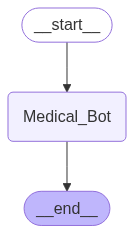

In [24]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver

workflow = StateGraph(State)

workflow.add_node("Medical_Bot", call_node)

workflow.add_edge(START, "Medical_Bot")
workflow.add_edge("Medical_Bot", END)

memory = InMemorySaver()
app = workflow.compile(checkpointer=memory)

display(Image(app.get_graph().draw_mermaid_png()))

## Define the Thread

In [25]:
config = {
    "configurable": {
        "thread_id": "1"
    }
}

In [26]:
output = app.invoke(
    {
        "messages": "HI, I'm Al Amin. Nice to meed you."
    },
    config=config
)

for m in output["messages"]:
    m.pretty_print()

================================ Human Message =================================

HI, I'm Al Amin. Nice to meed you.
================================ Human Message =================================

Nice to meet you too, Al Amin! How's your day going so far?


In [27]:
output = app.invoke(
    {
        "messages": "what is my name?"
    },
    config=config
)

for m in output["messages"][-2: ]:
    m.pretty_print()

================================ Human Message =================================

what is my name?
================================ Human Message =================================

Your name is Al Amin! We just started chatting a minute ago.


In [28]:
print(app.get_state(config=config))

StateSnapshot(values={'messages': [HumanMessage(content="HI, I'm Al Amin. Nice to meed you.", additional_kwargs={}, response_metadata={}, id='93d610b2-4b94-42b7-9271-ec96fb33fa1e'), HumanMessage(content="Nice to meet you too, Al Amin! How's your day going so far?", additional_kwargs={}, response_metadata={}, id='dca6388e-3f30-49a5-a3aa-2713d4741c9d'), HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}, id='17ebae98-62d7-4310-8220-598924015e71'), HumanMessage(content='Your name is Al Amin! We just started chatting a minute ago.', additional_kwargs={}, response_metadata={}, id='21236b85-2e5b-4efa-8478-47a8e4fd04f1')]}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f04fea0-c824-6d44-8004-cf9725f944b1'}}, metadata={'source': 'loop', 'writes': {'Medical_Bot': {'messages': 'Your name is Al Amin! We just started chatting a minute ago.'}}, 'step': 4, 'parents': {}, 'thread_id': '1'}, created_at='2025-06-23T04:25:09.

## **Tools calling React Agent**

- search tools
    - Tavily Search
- math tools

- Before building Tools agent first explain how the tools is work

## **User define Tool**

## **Import Powerful Reasoning MODEL**

In [29]:
llm = ChatGroq(model="qwen/qwen3-32b")
llm.invoke("test line")

AIMessage(content='<think>\nOkay, the user sent "test line". I should respond with a friendly and helpful message. Maybe ask how I can assist them. Keep it open-ended so they feel comfortable to ask anything. Let me make sure the tone is welcoming and not too formal.\n</think>\n\nHello! How can I assist you today? Feel free to ask anything or let me know if you need help with a specific task. 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 10, 'total_tokens': 96, 'completion_time': 0.192182463, 'prompt_time': 0.000381544, 'queue_time': 0.059814276, 'total_time': 0.192564007}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_8487b76fd3', 'finish_reason': 'stop', 'logprobs': None}, id='run--a0f59b54-d403-4d66-828b-7e87a88bc440-0', usage_metadata={'input_tokens': 10, 'output_tokens': 86, 'total_tokens': 96})

In [30]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """
    This is add function. Take 2 int number and return an integer number
    
    Args:
        a: (int) first parameter.
        b: (int) second parameter.
    
    return an integer number.
    """
    
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """
    This is multiply function. Take 2 int number and return an integer number
    
    Args:
        a: (int) first parameter.
        b: (int) second parameter.
    
    return an integer number.
    """
    
    return a * b

In [31]:
add.invoke(
    {
        "a": 5,
        "b": 3
    }
)

8

In [32]:
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

from langchain_tavily import TavilySearch

search = TavilySearch(
    max_results=3,
    topic="general",
)

search.invoke("tell me about North South University.")

{'query': 'tell me about North South University.',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://en.wikipedia.org/wiki/North_South_University',
   'title': 'North South University - Wikipedia',
   'content': 'North South University is a private research university in Dhaka, Bangladesh. It was established in 1992 under the Private University Act, 1992 by the then',
   'score': 0.8839694,
   'raw_content': None},
  {'url': 'https://www.northsouth.edu/about/facts.html',
   'title': 'Facts About NSU - North South University',
   'content': 'North South University is the first private university of Bangladesh, was established in 1992.',
   'score': 0.8335554,
   'raw_content': None},
  {'url': 'https://www.northsouth.edu/',
   'title': 'North South University: Home',
   'content': 'North South University is the first private university of Bangladesh, was established in 1992.',
   'score': 0.82186085,
   'raw_content': None}],
 'response_time': 1

In [33]:
tools = [add, multiply, search]

In [34]:
llm_with_tools = llm.bind_tools(tools, parallel_tool_calls=False)

In [35]:
response = llm_with_tools.invoke("can you add this tow number 4 and 6")
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'rshmt56bq', 'function': {'arguments': '{"a":4,"b":6}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 105, 'prompt_tokens': 1178, 'total_tokens': 1283, 'completion_time': 0.151141624, 'prompt_time': 0.049904327, 'queue_time': 0.060174853, 'total_time': 0.201045951}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_8487b76fd3', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--86782a68-f034-4755-8b00-298312c9b30c-0', tool_calls=[{'name': 'add', 'args': {'a': 4, 'b': 6}, 'id': 'rshmt56bq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1178, 'output_tokens': 105, 'total_tokens': 1283})

In [36]:
response.tool_calls[0]

{'name': 'add',
 'args': {'a': 4, 'b': 6},
 'id': 'rshmt56bq',
 'type': 'tool_call'}

In [37]:
tools_messages = add.invoke(response.tool_calls[0])
tools_messages

ToolMessage(content='10', name='add', tool_call_id='rshmt56bq')

In [38]:
llm_with_tools.invoke(["can you add this tow number 4 and 6.", tools_messages])

AIMessage(content='The sum of 4 and 6 is **10**.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 1190, 'total_tokens': 1318, 'completion_time': 0.245982233, 'prompt_time': 0.050536355, 'queue_time': 0.054259118, 'total_time': 0.296518588}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_8487b76fd3', 'finish_reason': 'stop', 'logprobs': None}, id='run--3b11308c-04cb-4802-bd97-ef1126e820fa-0', usage_metadata={'input_tokens': 1190, 'output_tokens': 128, 'total_tokens': 1318})

In [55]:
react_prompt = """

You are an AI assistant with access to four math tools (add, multiply, divide) and a web_search tool. For each user query, follow the ReAct pattern:

- Thought: Reflect on whether the user’s request involves a math operation (addition, multiplication, division) or requires external information (web search), or a combination.
- Action: If a tool is needed, output a JSON object exactly matching the Pydantic schema for ToolInvocation. Do NOT output any other text when calling a tool—only the JSON.
- Observation: After the tool runs, you will receive the result. Then think again, possibly call another tool, or produce a final answer.
- Final Answer: When you have enough information, respond with a natural-language answer summarizing the result or performing any necessary reasoning.

Tool details:
- add: adds two numbers. Input: "a": number, "b": number
- multiply: multiplies two numbers. Input: "a": number, "b": number
- divide: divides a by b. If b is zero, respond with an appropriate error message. Input: "a": number, "b": number
- web_search: searches for information online. Input: string

the user question is: {question}


"""

In [56]:
from langchain_core.prompts import PromptTemplate



def call_boss(state: MessagesState):
    prompt = PromptTemplate(
        template= react_prompt,
        input_variables= ["question"]
    )
    
    react_chain = prompt | llm_with_tools
    
    question = state["messages"]
    
    response = react_chain.invoke(
        {
            "question": question
        }
    )
    
    return {
        "messages": response
    }

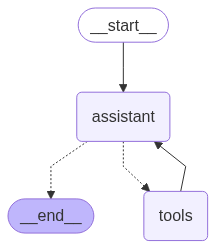

In [57]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(MessagesState)


builder.add_node("assistant", call_boss)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition
)
builder.add_edge("assistant", END)
builder.add_edge("tools", "assistant")

app2 = builder.compile()

display(Image(app2.get_graph().draw_mermaid_png()))

In [58]:
output = app2.invoke(
    {
        "messages": "Can you add this two number 2 and 6 and multiply with 5"
    }
)

for m in output["messages"]:
    m.pretty_print()

================================ Human Message =================================

Can you add this two number 2 and 6 and multiply with 5
================================== Ai Message ==================================
Tool Calls:
  add (z1hnvtk0z)
 Call ID: z1hnvtk0z
  Args:
    a: 2
    b: 6
================================= Tool Message =================================
Name: add

8
================================== Ai Message ==================================
Tool Calls:
  multiply (wh97xjpgm)
 Call ID: wh97xjpgm
  Args:
    a: 8
    b: 5
================================= Tool Message =================================
Name: multiply

40
================================== Ai Message ==================================

The final answer is 40.


In [59]:
output = app2.invoke(
    {
        "messages": "Can you add this two number 2 and 6"
    }
)

for m in output["messages"]:
    m.pretty_print()

================================ Human Message =================================

Can you add this two number 2 and 6
================================== Ai Message ==================================
Tool Calls:
  add (x2jms5b9n)
 Call ID: x2jms5b9n
  Args:
    a: 2
    b: 6
================================= Tool Message =================================
Name: add

8
================================== Ai Message ==================================

The sum of 2 and 6 is 8.


In [60]:
from langchain_core.messages import HumanMessage

input = "what is the current weather of bangladesh and multiply 10 with the weather."

{
    "messages": HumanMessage(content=input)
}

for event in app2.stream({"messages": input}, stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is the current weather of bangladesh and multiply 10 with the weather.
================================== Ai Message ==================================
Tool Calls:
  tavily_search (9cv486qy0)
 Call ID: 9cv486qy0
  Args:
    query: current weather in Bangladesh
================================= Tool Message =================================
Name: tavily_search

{"query": "current weather in Bangladesh", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Weather in Bangladesh", "url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Dhaka', 'region': '', 'country': 'Bangladesh', 'lat': 23.723, 'lon': 90.409, 'tz_id': 'Asia/Dhaka', 'localtime_epoch': 1750653228, 'localtime': '2025-06-23 10:33'}, 'current': {'last_updated_epoch': 1750653000, 'last_updated': '2025-06-23 10:30', 'temp_c': 32.3, 'temp_f': 90.1, 'is_day': 1, 'condition': {'text': 'Thundery outb